# Overview

I will be working with Zillow's publicly available Zillow House Value Index (ZHVI) https://www.zillow.com/research/data/

- Specifically, I will be using the Home Value data set for:
  - Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
  - Geography = "City"

[Data Source](https://drive.google.com/file/d/1O_g44QAfe3uVF-1heAC0BAeVDoWloVR-/view?usp=sharing)

# Tasks

## Part 1
- First, I will prepare the dataset for time series analysis:
  - Load in the Zillow Home Value Index dataframe.
  - Filter the 4 largest cities into a new dataframe.
  - Melt the data to long-form and prepare it for time series analysis.
    - Convert the melted dates into datetime datatype.
    - Make the datetime column the index.
  - Resample the dataframe as monthly frequency, grouped by City.

## Part 2
- Once I've prepared the dataframe with the time series data for the 4 largest cities:
  - Plot the home values for all 4 cities using unstack.
    - Make sure to add a title and axis labels.
    - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")

Answer the following 2 questions using pandas:
1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

2) How much did the home values change from November 2008 to December 2008 (in dollars)?


# Imports

In [1]:
import pandas as pd
import matplotlib.ticker as mticks

import warnings
warnings.filterwarnings('ignore')

# Part 1

## Load in the ZHVI dataframe

In [2]:
filename = 'Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


In [3]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


## Filter the 4 largest cities into a new dataframe

In [4]:
size_df = df[df['SizeRank'] <= 3].copy()

size_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt the data to long-form and prepare for time series

In [5]:
keep_these = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 
              'State', 'Metro', 'CountyName']

melted = pd.melt(size_df, keep_these, value_name = 'HomePrice', var_name = 'Date')
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   Date        1092 non-null   object 
 9   HomePrice   1087 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


In [6]:
melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomePrice
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0


### Convert the melted dates into datetime datatype

In [7]:
melted['Date'] = pd.to_datetime(melted['Date'])

melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   HomePrice   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


### Make the datetime column the index.

In [8]:
melted = melted.set_index('Date')

melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomePrice
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


## Resample the dataframe (monthly by City)

In [9]:
sorted_df = melted.groupby('RegionName').resample('MS').sum(numeric_only = True)

sorted_df

RegionID  SizeRank  HomePrice
RegionName Date                                     
Chicago    2000-01-01     17426         3   166139.0
           2000-02-01     17426         3   166536.0
           2000-03-01     17426         3   167368.0
           2000-04-01     17426         3   168826.0
           2000-05-01     17426         3   170499.0
...                         ...       ...        ...
New York   2022-05-01      6181         0   768797.0
           2022-06-01      6181         0   773944.0
           2022-07-01      6181         0   777692.0
           2022-08-01      6181         0   779960.0
           2022-09-01      6181         0   781622.0

[1092 rows x 3 columns]

## Drop unnecessary columns

In [10]:
sorted_df = sorted_df.drop(columns = ['RegionID', 'SizeRank'])

# check
sorted_df

HomePrice
RegionName Date                 
Chicago    2000-01-01   166139.0
           2000-02-01   166536.0
           2000-03-01   167368.0
           2000-04-01   168826.0
           2000-05-01   170499.0
...                          ...
New York   2022-05-01   768797.0
           2022-06-01   773944.0
           2022-07-01   777692.0
           2022-08-01   779960.0
           2022-09-01   781622.0

[1092 rows x 1 columns]

# Part 2

In [11]:
def thousands(x, pos):
    '''formats money in thousands'''
    new_x = x / 1000
    return f"{new_x:,.0f}K"

## Plot the home values for all 4 cities using unstack

In [12]:
unstacked_df = sorted_df.unstack(level = 0)

unstacked_df

HomePrice                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

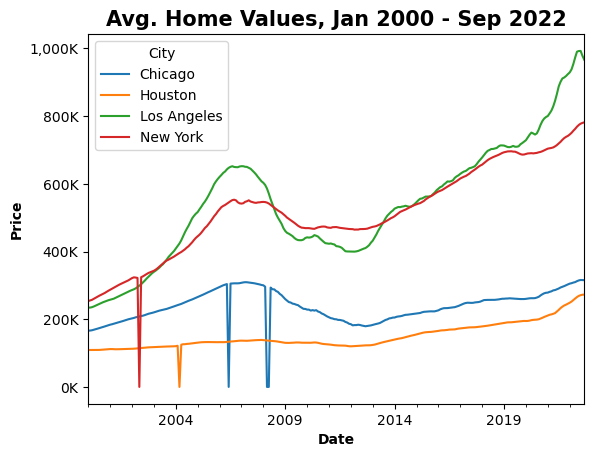

In [13]:
ax = unstacked_df['HomePrice'].plot()

fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)


ax.set_title('Avg. Home Values, Jan 2000 - Sep 2022', fontsize = 15, weight = 'bold')
ax.set_ylabel('Price', fontsize = 10, weight = 'bold')
ax.set_xlabel('Date', fontsize = 10, weight = 'bold')

ax.legend(title = 'City');

## Question 1

### Cities with highest & lowest Typical Home Value at end of 2008? 

In [14]:
end_of_08 = sorted_df.loc[pd.IndexSlice[:, '2008-12-01'], :]

end_of_08

,,HomePrice
RegionName,Date,
Chicago,2008-12-01,265306.0
Houston,2008-12-01,131283.0
Los Angeles,2008-12-01,469294.0
New York,2008-12-01,510309.0


In [15]:
end_of_08_max = end_of_08.idxmax()
end_of_08_min = end_of_08.idxmin()

print(end_of_08_max)
print()
print(end_of_08_min)

HomePrice    (New York, 2008-12-01 00:00:00)
dtype: object

HomePrice    (Houston, 2008-12-01 00:00:00)
dtype: object


In [16]:
max_city = sorted_df.loc[end_of_08_max].index[0][0]
min_city = sorted_df.loc[end_of_08_min].index[0][0]

print(max_city)
print()
print(min_city)

New York

Houston


In [17]:
max_price = sorted_df.loc[pd.IndexSlice[max_city, '2008-12-01'], 'HomePrice']
min_price = sorted_df.loc[pd.IndexSlice[min_city, '2008-12-01'], 'HomePrice']

print(max_price)
print()
print(min_price)

510309.0

131283.0


In [18]:
print(f'{max_city} had the highest typical home value at the end of 2008, \
with a typical home value of ${max_price:,.0f}.')

New York had the highest typical home value at the end of 2008, with a typical home value of $510,309.


In [19]:
print(f'{min_city} had the lowest typical home value at the end of 2008, \
with a typical home value of ${min_price:,.0f}.')

Houston had the lowest typical home value at the end of 2008, with a typical home value of $131,283.


## Question 2

### What were the home value changes from November 2008 to December 2008?

In [20]:
nov_08 = sorted_df.loc[pd.IndexSlice[:, '2008-11-01'], :]
nov_08_avg = nov_08.mean()

nov_08_avg

HomePrice    349994.5
dtype: float64

In [21]:
dec_08 = sorted_df.loc[pd.IndexSlice[:, '2008-12-01'], :]
dec_08_avg = dec_08.mean()

dec_08_avg

HomePrice    344048.0
dtype: float64

In [22]:
difference_08 = nov_08_avg - dec_08_avg
difference_08

HomePrice    5946.5
dtype: float64

In [24]:
count = 0
city_list = ['Chicago', 'Houston', 'Los Angeles', 'New York']
difference_df = pd.DataFrame()
for city in city_list:
    nov_price = sorted_df.loc[pd.IndexSlice[city, '2008-11-01'], 'HomePrice']
    dec_price = sorted_df.loc[pd.IndexSlice[city, '2008-12-01'], 'HomePrice']
    temp_df = pd.DataFrame(
        {
            'City': city,
            'November Price': nov_price,
            'December Price':  dec_price,
            'Difference' : nov_price - dec_price
        }, index=[count])
    difference_df = pd.concat([difference_df, temp_df])
    count += 1

In [25]:
pd.DataFrame(difference_df)

,City,November Price,December Price,Difference
0,Chicago,271059.0,265306.0,5753.0
1,Houston,132247.0,131283.0,964.0
2,Los Angeles,481905.0,469294.0,12611.0
3,New York,514767.0,510309.0,4458.0


In [50]:
count = 0
for city in difference_df['City']:
    diff = difference_df['Difference'][count]
    nov = difference_df['November Price'][count]
    dec = difference_df['December Price'][count]

    print(f'The average home value in {city} went from ${nov:,.0f} in November \
2008 to ${dec:,.0f} in December 2008, which is a difference of {diff:,.0f}.')
    count += 1
    print()

The average home value in Chicago went from $271,059 in November 2008 to $265,306 in December 2008, which is a difference of 5,753.

The average home value in Houston went from $132,247 in November 2008 to $131,283 in December 2008, which is a difference of 964.

The average home value in Los Angeles went from $481,905 in November 2008 to $469,294 in December 2008, which is a difference of 12,611.

The average home value in New York went from $514,767 in November 2008 to $510,309 in December 2008, which is a difference of 4,458.



In [23]:
print(f'The average home value in the top 4 cities (Chicago, Houston, \
Los Angeles & New York) went from ${nov_08_avg[0]:,.0f} in \
November 2008 to ${dec_08_avg[0]:,.0f} in December 2008, which is \
a difference of {difference_08[0]:,.0f}.')

The average home value in the top 4 cities (Chicago, Houston, Los Angeles & New York) went from $349,994 in November 2008 to $344,048 in December 2008, which is a difference of 5,946.
